In [ ]:
reset -fs

In [594]:
%matplotlib inline

import os
import pandas as pd
import yaml
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.dates as mdates

In [595]:
credentials = yaml.load(open(os.path.expanduser('~/.scripts/credentials.yml')))

In [596]:
engine = create_engine(
        'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**credentials['rds']))


In [597]:
engine.table_names()

['quakes']

In [675]:
pd.read_sql("SELECT COUNT(*) FROM quakes", engine)

,count
0,480499


In [376]:
# top 10 recent earthquakes with magnitude > 5.5
pd.read_sql("SELECT isotime, magnitude, longitude, latitude, altitude FROM quakes WHERE magnitude > 5.5 ORDER BY isotime DESC LIMIT 10", engine)


,isotime,magnitude,longitude,latitude,altitude
0,2017-05-09 13:52:10.920,6.8,167.3750,-14.5975,169.00
1,2017-05-09 01:54:14.520,6.0,126.2875,24.4414,10.00
2,2017-05-08 17:00:47.000,6.2,-178.6361,51.7545,10.00
3,2017-05-08 15:47:30.000,5.9,-177.0827,51.1276,22.82
4,2017-05-08 15:31:26.000,5.7,-177.1678,51.0905,17.00
5,2017-05-06 00:16:09.000,5.8,-37.9583,-60.7984,10.00
6,2017-05-05 05:09:35.000,5.8,71.4438,39.4749,10.00
7,2017-05-03 04:47:13.000,5.9,71.4027,39.5100,10.00
8,2017-05-02 15:10:22.000,5.9,-13.9218,-11.7183,10.00
9,2017-05-01 14:18:17.000,6.3,-136.6890,59.7708,20.00


In [672]:
# top 10 earthquakes since 5/22/2013
top_10 = pd.read_sql("SELECT isotime, magnitude, longitude, latitude, altitude FROM quakes ORDER BY magnitude DESC", engine)
top_10 = top_10.dropna()
top_10.head(10)

,isotime,magnitude,longitude,latitude,altitude
1790,2013-05-24 05:44:48,8.3,153.2210,54.8920,598.10
1791,2015-09-16 22:54:32,8.3,-71.6744,-31.5729,22.44
1792,2014-04-01 23:46:47,8.2,-70.7691,-19.6097,25.00
1793,2017-01-22 04:30:22,7.9,155.1718,-6.2464,135.00
1794,2014-06-23 20:53:09,7.9,178.7352,51.8486,109.00
1795,2016-12-17 10:51:10,7.9,153.5216,-4.5049,94.54
1796,2016-03-02 12:49:48,7.8,94.3299,-4.9521,24.00
1797,2016-11-13 11:02:56,7.8,173.0540,-42.7373,15.11
1798,2015-04-25 06:11:25,7.8,84.7314,28.2305,8.22
1799,2015-05-30 11:23:02,7.8,140.4931,27.8386,664.00


In [661]:
# http://mbostock.github.io/protovis/ex/us_lowres.js
# name:'California', code:'ca', borders:
ca = [[-120.014648,41.983994],[-120.014648,38.993572],[-114.653320,35.065971],[-114.697266,34.849873],[-114.191895,34.288994],[-114.521484,33.943359],[-114.565430,33.632915],[-114.763184,33.394760],[-114.697266,33.063923],[-114.477539,33.008663],[-114.455566,32.879585],[-114.785156,32.694866],[-117.136230,32.546814],[-117.312012,32.824211],[-117.377930,33.174343],[-118.081055,33.742611],[-118.388672,33.760883],[-118.476562,33.998028],[-118.828125,34.052658],[-119.245605,34.125446],[-119.509277,34.397842],[-120.498047,34.452217],[-120.651855,34.885929],[-120.673828,35.173809],[-120.871582,35.263561],[-120.893555,35.460670],[-121.376953,35.657295],[-121.420898,35.871246],[-121.684570,36.137875],[-121.970215,36.368221],[-121.970215,36.615528],[-121.816406,36.809284],[-121.926270,36.949890],[-122.233887,37.002552],[-122.475586,37.195332],[-122.541504,37.561996],[-122.497559,37.770714],[-122.189941,37.474857],[-122.167969,37.683819],[-122.343750,37.822803],[-122.387695,37.961521],[-122.233887,38.082687],[-122.497559,38.117271],[-122.497559,37.840157],[-122.739258,37.944199],[-122.871094,38.048092],[-123.002930,38.048092],[-122.980957,38.238178],[-123.134766,38.427773],[-123.376465,38.444984],[-123.398438,38.616871],[-123.771973,38.908131],[-123.728027,39.095963],[-123.837891,39.402245],[-123.793945,39.791653],[-124.409180,40.346542],[-124.321289,40.730606],[-124.145508,40.913513],[-124.167480,41.178654],[-124.035645,41.409775],[-124.255371,41.771313],[-124.299316,42.016651],[-120.014648,41.983994]]
                                         

In [667]:
# Rectangular boundaries
long = sorted([i[0] for i in ca])
print("California Longitude Boundaries: {}, {}".format(min(long), max(long)))
lat = sorted([i[1] for i in ca])
print("California Latitude Boundaries: {}, {}".format(min(lat), max(lat)))

California Longitude Boundaries: -124.40918, -114.191895
California Latitude Boundaries: 32.546814, 42.016651


In [668]:
# name:'Oklahoma', code:'ok', borders:
ok = [[-94.647217,37.028870],[-103.018799,37.011326],[-103.029785,36.483143],[-100.019531,36.509636],[-99.997559,34.606087],[-99.711914,34.415974],[-99.569092,34.434097],[-99.404297,34.370644],[-99.382324,34.470333],[-99.206543,34.334366],[-99.195557,34.225430],[-98.975830,34.225430],[-98.712158,34.107254],[-98.646240,34.170906],[-98.514404,34.098160],[-98.382568,34.161816],[-98.085938,34.116352],[-98.085938,34.016239],[-97.976074,34.016239],[-97.965088,33.897778],[-97.855225,33.861294],[-97.690430,33.998028],[-97.569580,33.916012],[-97.481689,33.934242],[-97.426758,33.833920],[-97.261963,33.897778],[-97.250977,33.979809],[-97.185059,33.770016],[-97.075195,33.833920],[-97.009277,33.961586],[-96.866455,33.879536],[-96.448975,33.779148],[-96.372070,33.696922],[-96.306152,33.770016],[-96.218262,33.760883],[-96.185303,33.852169],[-95.921631,33.879536],[-95.800781,33.852169],[-95.614014,33.943359],[-95.383301,33.879536],[-95.218506,33.979809],[-94.515381,33.642063],[-94.416504,35.344254],[-94.625244,36.491974],[-94.647217,37.028870]]

In [670]:
# Rectangular boundaries
ok_long = sorted([i[0] for i in ok])
print("Oklahoma Longitude Boundaries: {}, {}".format(min(ok_long), max(ok_long)))
ok_lat = sorted([i[1] for i in ok])
print("Oklahoma Latitude Boundaries: {}, {}".format(min(ok_lat), max(ok_lat)))

Oklahoma Longitude Boundaries: -103.029785, -94.416504
Oklahoma Latitude Boundaries: 33.642063, 37.02887


In [682]:
long_min=-124.40918 
long_max=-114.191895 
lat_min=32.546814 
lat_max=42.016651
state = "california"

In [680]:
cal = pd.read_sql("SELECT isotime, magnitude FROM quakes WHERE (longitude >= {} and longitude <= {}) and (latitude >= {} and latitude <= {}) ORDER BY isotime DESC LIMIT 100".format(long_min, long_max, lat_min, lat_max), engine)
cal.head()

,isotime,magnitude
0,2017-05-10 23:56:47.280,0.90
1,2017-05-10 23:47:13.190,0.85
2,2017-05-10 23:25:03.170,1.35
3,2017-05-10 23:06:36.780,0.88
4,2017-05-10 22:36:56.970,1.19


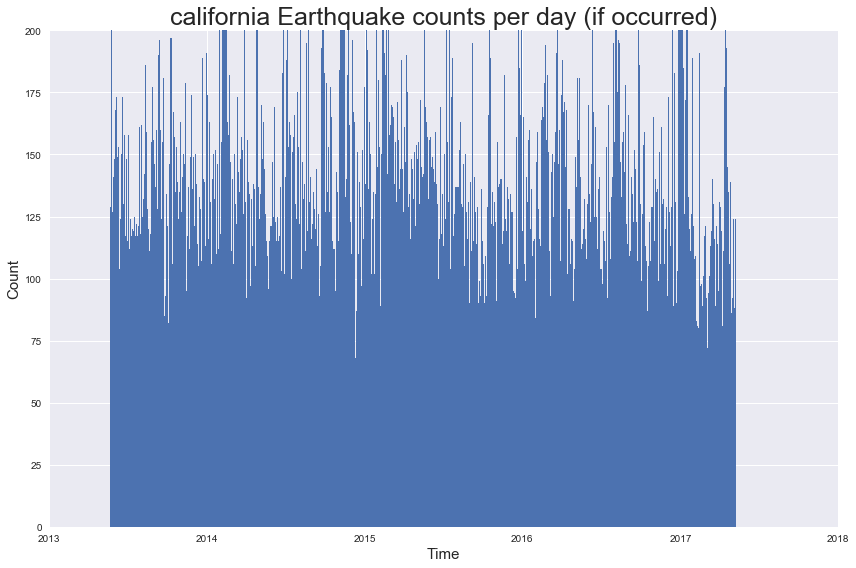

In [683]:
tbl2 = pd.read_sql("SELECT isotime FROM quakes WHERE (longitude >= {} and longitude <= {}) and (latitude >= {} and latitude <= {})".format(long_min, long_max, lat_min, lat_max), engine)
locator = mdates.AutoDateLocator()
years = mdates.YearLocator()

fig, ax = plt.subplots(figsize=(12, 8))
data = tbl2.isotime.dt.date
mpl_data = mdates.date2num(data)
ax.hist(mpl_data, bins=len(data.unique()))
ax.set_title("{} Earthquake counts per day (if occurred)".format(state), fontsize=25)
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel("Time", fontsize=15)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
datemin = datetime.date(tbl2.isotime.min().year, 1, 1)
datemax = datetime.date(tbl2.isotime.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.set_ylim(0, 200)
ax.grid(True)
fig.tight_layout()
state_quakes = "{}_quakes.png".format(state)
fig.savefig(state_quakes)

/Users/adamszabunio/anaconda/envs/dsci6007/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/adamszabunio/anaconda/envs/dsci6007/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


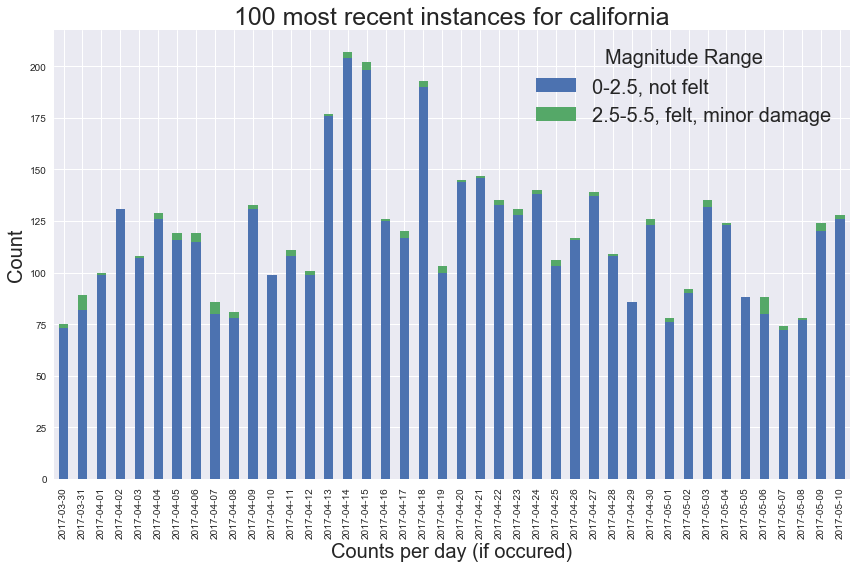

In [686]:
california_recent = pd.read_sql("SELECT isotime, magnitude FROM quakes WHERE (longitude >= {} and longitude <= {}) and (latitude >= {} and latitude <= {}) ORDER BY isotime DESC LIMIT 5000".format(long_min, long_max, lat_min, lat_max), engine)
ca_recent = california_recent.head(10).to_html()

tbl = california_recent.dropna()

tbl['magnitude'] = tbl['magnitude'].apply(lambda x: mag_category(x))
tbl.isotime = tbl.isotime.dt.date
tbl = tbl.groupby(['isotime', 'magnitude'])['isotime'].count().unstack('magnitude').fillna(0)

ax = tbl.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_title("100 most recent instances for {}".format(state), fontsize=25)
ax.legend(fontsize=20, loc=0)
ax.legend_.set_title("Magnitude Range", prop={'size': 20})
ax.set_ylabel("Count", fontsize=20)
ax.xaxis_date()
ax.set_xlabel("Counts per day (if occured)", fontsize=20)
ax.grid(True)
fig = ax.get_figure()
fig.tight_layout()
state_fig_name_stacked = '{}_recent_quakes_stacked.png'.format(state)
fig.savefig(state_fig_name_stacked)

In [619]:
tbl = pd.read_sql("SELECT isotime, magnitude FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887) ORDER BY isotime DESC LIMIT 100", engine)
tbl.tail()

,isotime,magnitude
95,2017-03-30 14:48:30,2.7
96,2017-03-30 07:14:07,2.5
97,2017-03-29 15:37:40,4.1
98,2017-03-29 10:42:55,2.6
99,2017-03-29 08:55:21,2.6


In [620]:
tbl = tbl.dropna()
tbl.count()

isotime      100
magnitude    100
dtype: int64

In [621]:
def mag_category(x):
    if x <= 2.5:
        return("0-2.5, not felt")
    elif x > 2.5 and x < 5.5:
        return("2.5-5.5, felt, minor damage")
    else:
        return("5.5 and above, damage")
        
tbl['magnitude']= tbl['magnitude'].apply(lambda x: mag_category(x))

In [622]:
tbl.isotime = tbl.isotime.dt.date
tbl.head()

,isotime,magnitude
0,2017-05-09,"2.5-5.5, felt, minor damage"
1,2017-05-07,"2.5-5.5, felt, minor damage"
2,2017-05-07,"2.5-5.5, felt, minor damage"
3,2017-05-07,"0-2.5, not felt"
4,2017-05-05,"2.5-5.5, felt, minor damage"


In [623]:
tbl = tbl.groupby(['isotime','magnitude'])['isotime'].count().unstack('magnitude').fillna(0)
tbl.head()

magnitude,"0-2.5, not felt","2.5-5.5, felt, minor damage"
isotime,,
2017-03-29,0.0,3.0
2017-03-30,2.0,2.0
2017-04-02,2.0,7.0
2017-04-03,2.0,1.0
2017-04-04,2.0,3.0


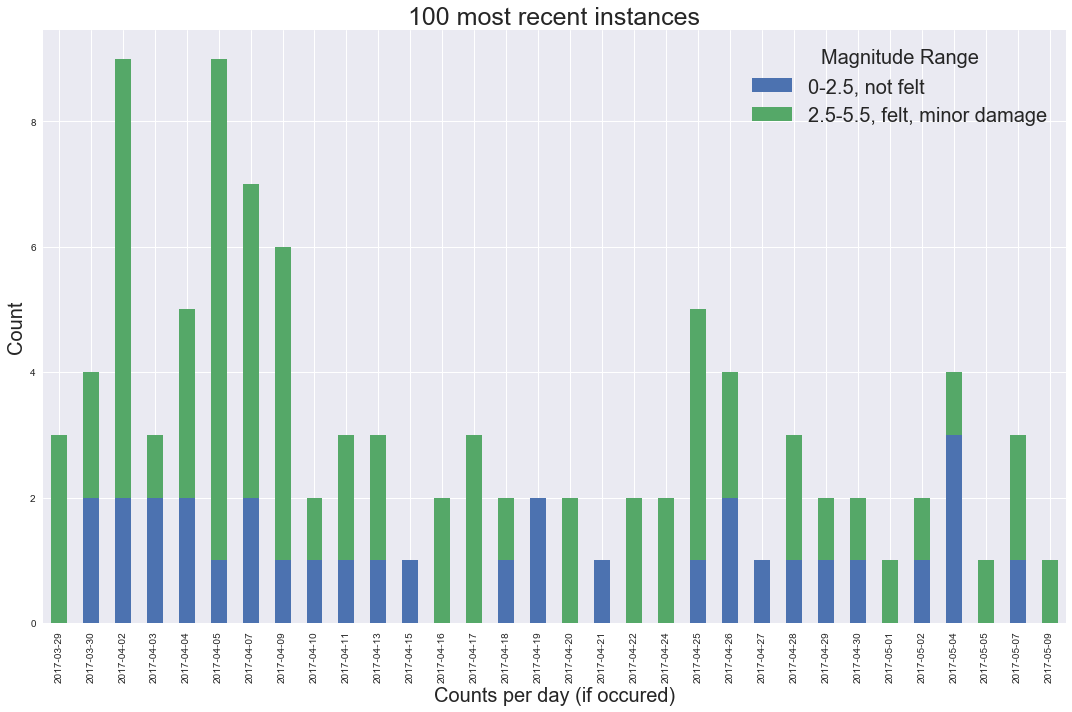

In [660]:
# fig = ax.get_figure()
ax = tbl.plot(kind='bar', stacked=True, figsize=(15,10))
ax.set_title("100 most recent instances", fontsize=25)
ax.legend(fontsize=20)
ax.legend_.set_title("Magnitude Range", prop={'size':20})
ax.set_ylabel("Count", fontsize=20)
ax.xaxis_date()
ax.set_xlabel("Counts per day (if occured)", fontsize=20)
ax.grid(True)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('recent_quakes_stacked.png')

In [625]:
tbl2 = pd.read_sql("SELECT isotime FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887)", engine)
tbl2.head()

,isotime
0,2015-06-10 21:27:00
1,2015-06-10 19:47:46
2,2015-06-10 17:54:31
3,2015-06-10 17:41:15
4,2015-06-10 13:05:08


In [626]:
data = tbl2.isotime.dt.date
len(data.unique())

1306

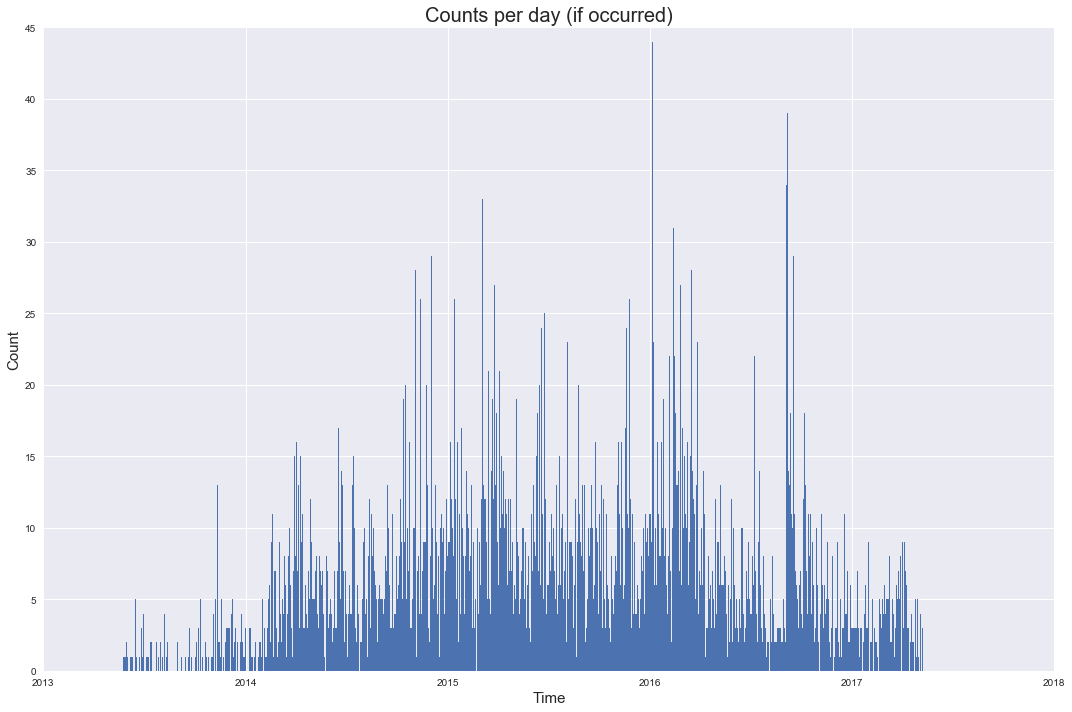

In [630]:
locator = mdates.AutoDateLocator()
years = mdates.YearLocator()   

fig, ax = plt.subplots(figsize=(15,10))
data = tbl2.isotime.dt.date
mpl_data = mdates.date2num(data)
ax.hist(mpl_data, bins=len(data.unique()))
ax.set_title("Counts per day (if occurred)", fontsize=20)
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel("Time", fontsize=15)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
datemin = datetime.date(tbl2.isotime.min().year, 1, 1)
datemax = datetime.date(tbl2.isotime.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.set_ylim(0,45)
ax.grid(True)
fig.tight_layout()
fig.savefig("ok_quakes.png")

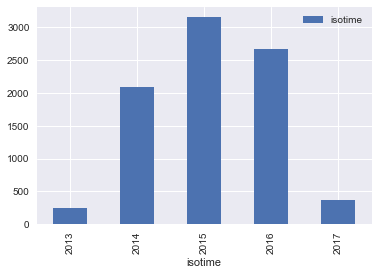

In [632]:
tbl2.groupby(tbl2.isotime.dt.year).count().plot(kind='bar');

In [635]:
tbl3 = pd.read_sql("SELECT magnitude FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887)", engine)
tbl3 = tbl3.dropna()
tbl3.head()

,magnitude
0,2.6
1,2.6
2,2.6
3,2.6
4,3.4


In [642]:
tbl3.count()

magnitude    8532
dtype: int64

In [637]:
len(tbl3.magnitude.unique())

124

In [641]:
tbl3.magnitude.max()

5.7999999999999998

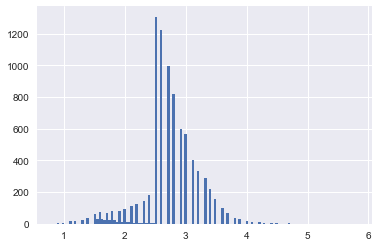

In [638]:
fig1 = plt.gcf()
plt.hist(x="magnitude", data=tbl3, bins=len(tbl3.magnitude.unique()))
# plt.savefig("oklahoma_quakes.png")
fig1.savefig("oklahoma_quakes.png")

In [96]:
tbl.groupby(["month_year"]).count()

,isotime,magnitude,longitude,latitude
month_year,,,,
2013.10,34,34,34,34
2013.11,72,72,72,72
2013.12,50,50,50,50
2013.5,6,6,6,6
2013.6,30,30,30,30
2013.7,22,22,22,22
2013.8,13,13,13,13
2013.9,18,18,18,18
2014.1,44,44,44,44
